# Proyek Analisis Data: Air Quality
- **Nama:** M. Raditya Adhirajasa
- **Email:** bejolearnings@gmail.com
- **ID Dicoding:** radito

## Menentukan Pertanyaan Bisnis

- Bagaimana pola konsentrasi PM2.5 selama musim dingin di berbagai stasiun dari tahun 2013-2017 dan bagaimana daerah-daerah tersebut dapat dikelompokkan berdasarkan tingkat polusi?
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
aoti_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
chang_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
ding_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
dong_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
guan_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
guch_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
huai_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
nong_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shun_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
tian_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
wanl_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
wans_df = pd.read_csv('/content/drive/MyDrive/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [87]:
merged_df = pd.concat([aoti_df, chang_df, guan_df, ding_df, dong_df, guch_df, huai_df, nong_df, shun_df,
                       tian_df, wanl_df, wans_df], ignore_index=True)

In [88]:
merged_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Terdapat data dari 12 stasiun berbeda
- Seluruh data digabungkan menjadi satu

### Assessing Data

In [89]:
# Hitung data yang duplikat

merged_df.duplicated().sum()

0

In [90]:
# Hitung missing value

merged_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


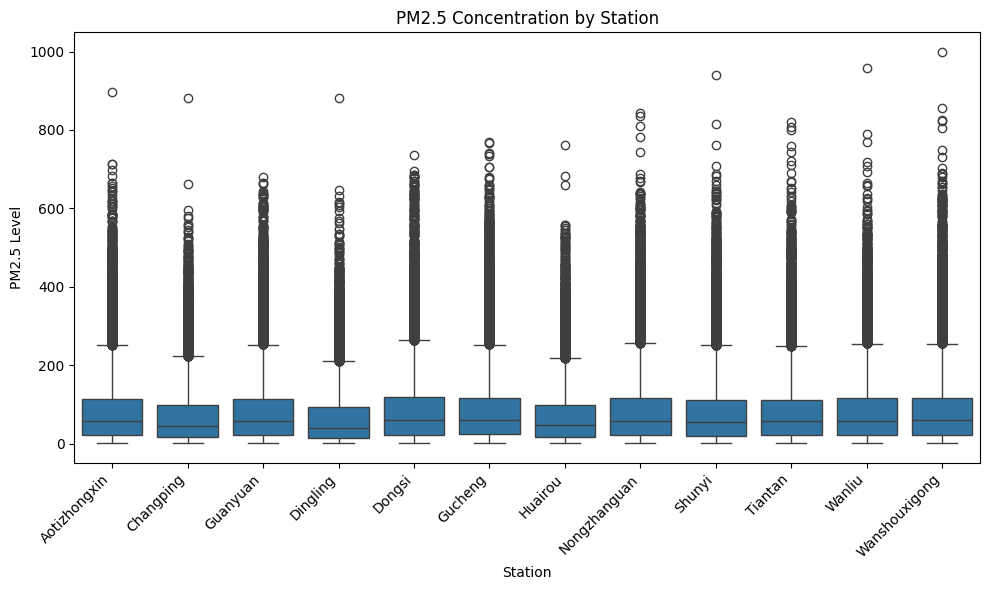

In [91]:
# Visualisasi bokplot untuk melihat outllier pada PM2.5

plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM2.5', data=merged_df)
plt.title('PM2.5 Concentration by Station')
plt.xlabel('Station')
plt.ylabel('PM2.5 Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

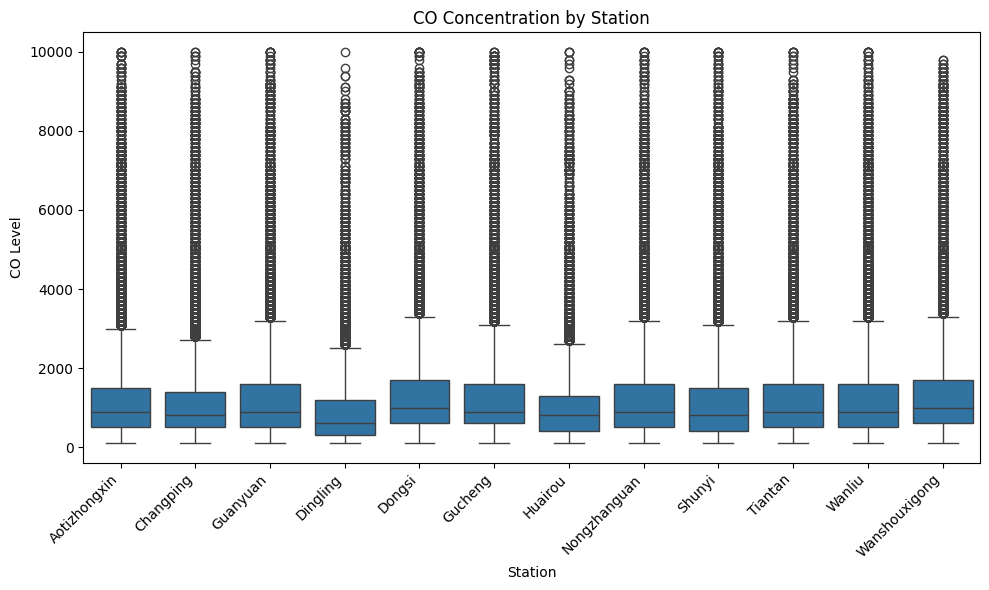

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='CO', data=merged_df)
plt.title('CO Concentration by Station')
plt.xlabel('Station')
plt.ylabel('CO Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

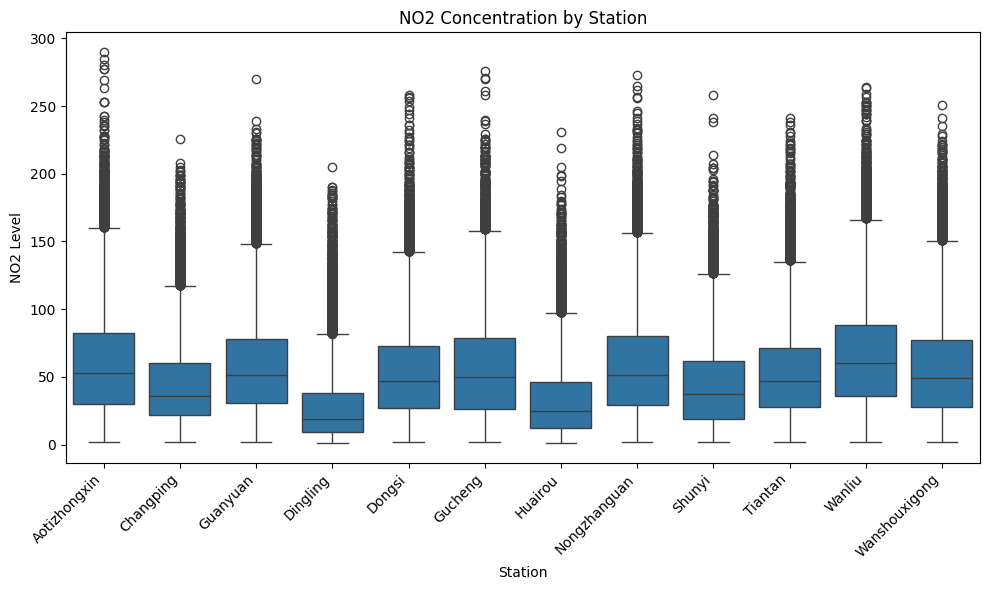

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='NO2', data=merged_df)
plt.title('NO2 Concentration by Station')
plt.xlabel('Station')
plt.ylabel('NO2 Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Data tidak memiliki nilai yang duplikat
- Data memiliki beberapa missing value
- Pada PM2.5, CO, No2 terdapat outlier

### Cleaning Data

In [94]:
merged_df.shape

(420768, 18)

In [95]:
# Drop missing value

merged_df = merged_df.dropna()

In [96]:
# Hitung Q1, Q3, dan IQR
Q1 = merged_df['PM2.5'].quantile(0.25)
Q3 = merged_df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter merged_df untuk menghapus outlier
filtered_merged_df = merged_df[(merged_df['PM2.5'] >= lower_bound) & (merged_df['PM2.5'] <= upper_bound)]

# Buang outlier
merged_df['PM2.5'] = merged_df['PM2.5'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

In [97]:
# Hitung Q1, Q3, dan IQR
Q1 = merged_df['CO'].quantile(0.25)
Q3 = merged_df['CO'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter merged_df untuk menghapus outlier
filtered_merged_df = merged_df[(merged_df['CO'] >= lower_bound) & (merged_df['CO'] <= upper_bound)]

# Buang outlier
merged_df['CO'] = merged_df['CO'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

In [98]:
# Hitung Q1, Q3, dan IQR
Q1 = merged_df['NO2'].quantile(0.25)
Q3 = merged_df['NO2'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter merged_df untuk menghapus outlier
filtered_merged_df = merged_df[(merged_df['NO2'] >= lower_bound) & (merged_df['NO2'] <= upper_bound)]

# Buang outlier
merged_df['NO2'] = merged_df['NO2'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

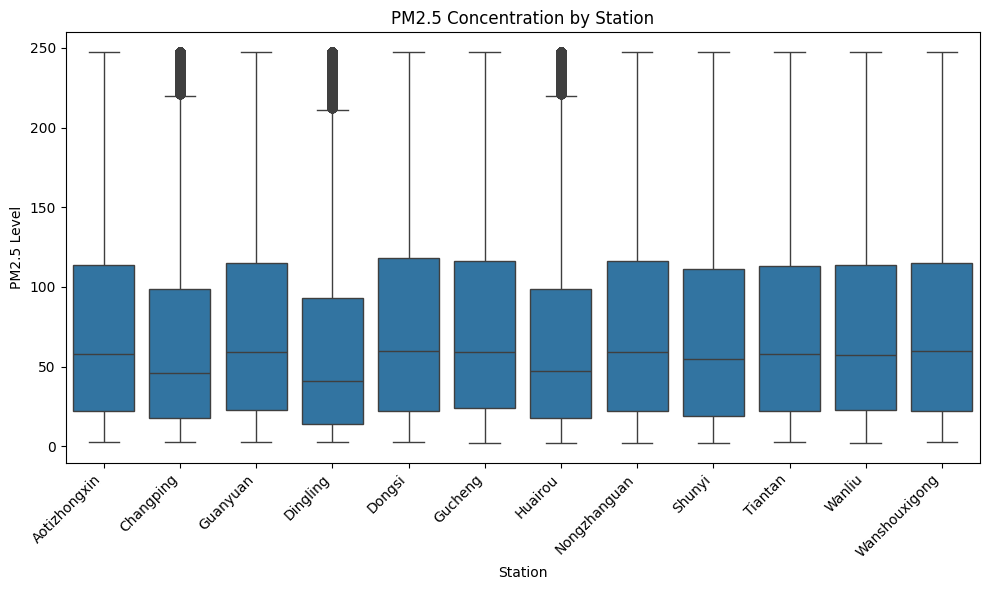

In [99]:
# Visualisasi data setelah membuang outlier

plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='PM2.5', data=merged_df)
plt.title('PM2.5 Concentration by Station')
plt.xlabel('Station')
plt.ylabel('PM2.5 Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

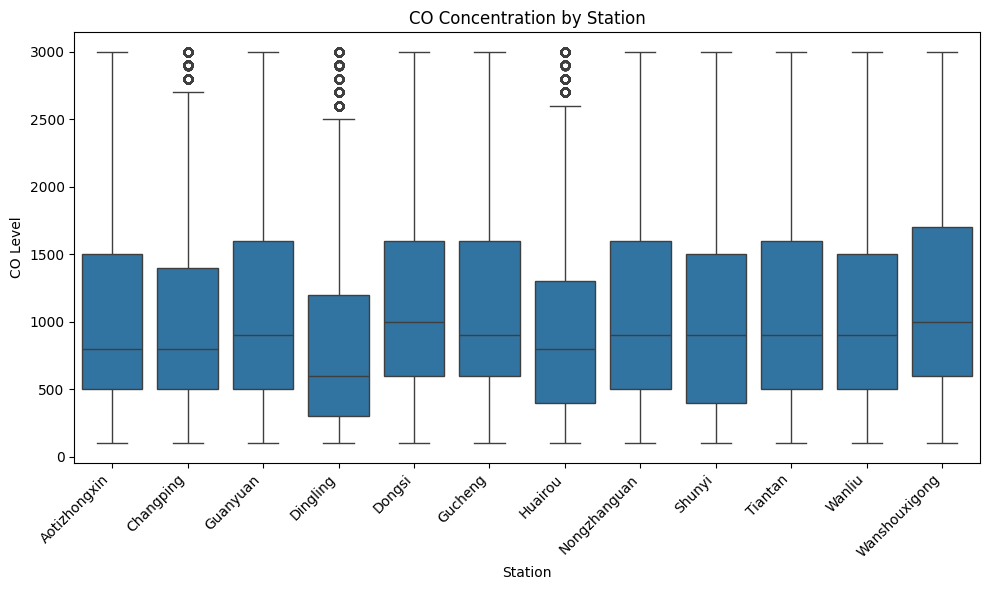

In [100]:
# Visualisasi data setelah membuang outlier

plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='CO', data=merged_df)
plt.title('CO Concentration by Station')
plt.xlabel('Station')
plt.ylabel('CO Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

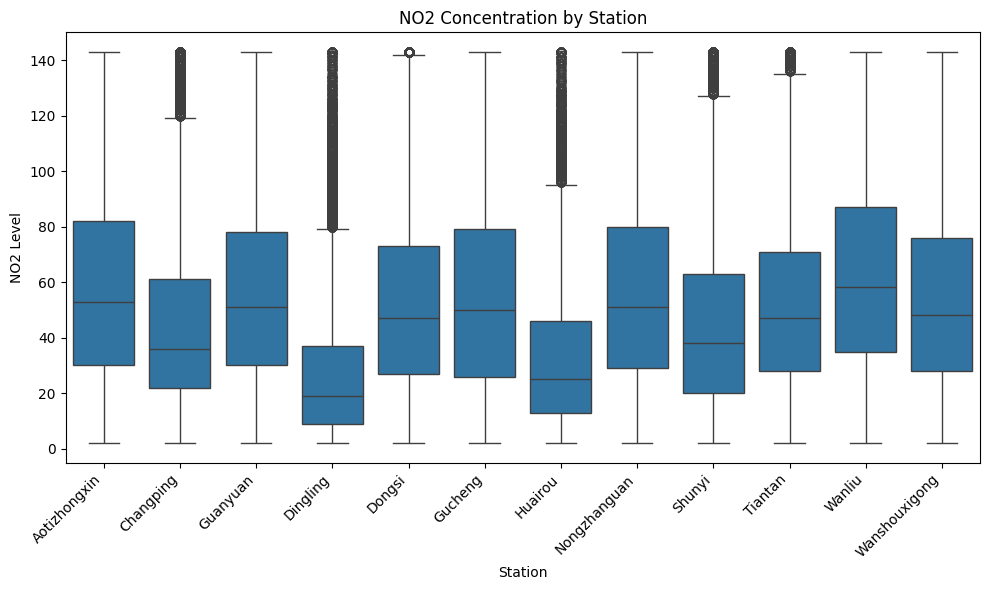

In [101]:
# Visualisasi data setelah membuang outlier

plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='NO2', data=merged_df)
plt.title('NO2 Concentration by Station')
plt.xlabel('Station')
plt.ylabel('NO2 Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Hapus missing value karena jumlahnya sedikit dibandingkan total jumlah dataset
- Mengatasi outlier menggunakan IQR pada PM2.5 karena akan digunakan untuk analisis

## Exploratory Data Analysis (EDA)

In [102]:
# Buat datetime

merged_df['datetime'] = pd.to_datetime(merged_df[['year', 'month', 'day', 'hour']])

In [103]:
merged_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [104]:
# Info dataset

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        382168 non-null  int64         
 1   year      382168 non-null  int64         
 2   month     382168 non-null  int64         
 3   day       382168 non-null  int64         
 4   hour      382168 non-null  int64         
 5   PM2.5     382168 non-null  float64       
 6   PM10      382168 non-null  float64       
 7   SO2       382168 non-null  float64       
 8   NO2       382168 non-null  float64       
 9   CO        382168 non-null  float64       
 10  O3        382168 non-null  float64       
 11  TEMP      382168 non-null  float64       
 12  PRES      382168 non-null  float64       
 13  DEWP      382168 non-null  float64       
 14  RAIN      382168 non-null  float64       
 15  wd        382168 non-null  object        
 16  WSPM      382168 non-null  float64       
 

In [105]:
# Deskripsi data

merged_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,75.837951,104.573837,15.634814,50.176085,1127.193255,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031,2015-03-19 02:55:51.850495232
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000,2013-03-01 00:00:00
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000,2014-04-05 09:00:00
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000,2015-03-25 06:00:00
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-03-09 18:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.500000,999.000000,500.000000,143.000000,3000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10001.787087,1.160266,3.449317,8.803064,6.933552,68.163150,91.379446,21.306103,33.766158,821.176101,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152,NaN


### Data Musim Panas

In [106]:
# Ambil data di musim panas (Juni, Juli, Agustus)

summer_data = merged_df[(merged_df['month'].isin([6, 7, 8]))]

In [107]:
# Ukuran data summer

summer_data.shape

(96145, 19)

In [108]:
# Hitung rata-rata PM2.5 di data summer

grouped_summer = summer_data.groupby('station')['PM2.5'].mean().reset_index()
grouped_summer.rename(columns={'PM2.5': 'avg_PM2.5'}, inplace=True)

In [109]:
def categorize(pm25):
    if pm25 < 60:
        return "Rendah"
    elif 60 <= pm25 < 80:
        return "Sedang"
    else:
        return "Tinggi"

grouped_summer['Kategori'] = grouped_summer['avg_PM2.5'].apply(categorize)
summer_data['Kategori'] = summer_data['PM2.5'].apply(categorize)

In [110]:
grouped_summer

,station,avg_PM2.5,Kategori
0,Aotizhongxin,66.509567,Sedang
1,Changping,55.026360,Rendah
2,Dingling,52.646178,Rendah
3,Dongsi,67.738028,Sedang
4,Guanyuan,68.661634,Sedang
5,Gucheng,66.170930,Sedang
6,Huairou,58.666585,Rendah
7,Nongzhanguan,65.603011,Sedang
8,Shunyi,65.163756,Sedang
9,Tiantan,68.284389,Sedang


In [111]:
summer_data['year_month'] = summer_data['datetime'].dt.to_period('M')

monthly_data = summer_data.groupby('year_month')['PM2.5'].mean().reset_index()

monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

monthly_data.head()

,year_month,PM2.5
0,2013-06-01,103.016577
1,2013-07-01,68.468453
2,2013-08-01,60.768722
3,2014-06-01,54.817272
4,2014-07-01,90.017562


### Data Emisi

In [112]:
filtered_emisi = merged_df[(merged_df['datetime'].dt.year == 2016)]

# Filter untuk jam sibuk (7:00–9:00 dan 17:00–19:00)
filtered_emisi = filtered_emisi[filtered_emisi['datetime'].dt.hour.isin([7, 8, 9, 17, 18, 19])]

In [113]:
filtered_emisi.shape

(25092, 19)

In [114]:
aggregated_emisi = filtered_emisi.groupby('station')[['NO2', 'CO']].mean().reset_index()

In [115]:
aggregated_emisi

,station,NO2,CO
0,Aotizhongxin,47.523742,1069.910672
1,Changping,49.415566,1113.066038
2,Dingling,27.582915,844.070352
3,Dongsi,50.029608,1132.139446
4,Guanyuan,54.013647,1091.764706
5,Gucheng,48.599342,1100.657586
6,Huairou,32.310928,920.502901
7,Nongzhanguan,51.681345,1089.393939
8,Shunyi,44.595476,986.533403
9,Tiantan,50.444393,1117.979611


In [116]:
scaled_emisi = aggregated_emisi.copy()

In [117]:
scaler = MinMaxScaler()
scaled_emisi[['NO2', 'CO']] = scaler.fit_transform(aggregated_emisi[['NO2', 'CO']])

In [118]:
scaled_emisi

,station,NO2,CO
0,Aotizhongxin,0.660519,0.774575
1,Changping,0.723184,0.922587
2,Dingling,0.000000,0.000000
3,Dongsi,0.743524,0.988004
4,Guanyuan,0.875491,0.849529
5,Gucheng,0.696147,0.880029
6,Huairou,0.156611,0.262144
7,Nongzhanguan,0.798236,0.841398
8,Shunyi,0.563524,0.488612
9,Tiantan,0.757263,0.939439


In [127]:
# Korelasi antara NO2 dan CO
correlation = scaled_emisi[['NO2', 'CO']].corr()
print(correlation)

          NO2        CO
NO2  1.000000  0.930927
CO   0.930927  1.000000


In [119]:
def classify_station(row):
    if row['NO2'] > 0.7 or row['CO'] > 0.7:
        return 'Tinggi'
    elif row['NO2'] > 0.4 or row['CO'] > 0.4:
        return 'Sedang'
    else:
        return 'Rendah'

scaled_emisi['Kategori'] = scaled_emisi.apply(classify_station, axis=1)

In [120]:
scaled_emisi

,station,NO2,CO,Kategori
0,Aotizhongxin,0.660519,0.774575,Tinggi
1,Changping,0.723184,0.922587,Tinggi
2,Dingling,0.000000,0.000000,Rendah
3,Dongsi,0.743524,0.988004,Tinggi
4,Guanyuan,0.875491,0.849529,Tinggi
5,Gucheng,0.696147,0.880029,Tinggi
6,Huairou,0.156611,0.262144,Rendah
7,Nongzhanguan,0.798236,0.841398,Tinggi
8,Shunyi,0.563524,0.488612,Sedang
9,Tiantan,0.757263,0.939439,Tinggi


**Insight:**
- Membuat datetime agar dapat mengolah data menggunakan tahun, bulan, hari, jam
- Total data yang digabungkan sekitar 382.168, memiliki 20 fitur, dan 12 class (stasiun)
- Setelah outlier dihilangkan dari NO2, CO, dan PM2.5 data menjadi lebih stabil, tidak ada yang terlalu tinggi dan rendah
- Untuk menjawab pertanyaan 1, ambil data dari musim panas (juni, juli, agustus). Data summer berjumlah 96.145, lalu dikelompokkan menjadi 3 kategori (rendah, sedang, tinggi). Data rata-rata kategorinya sedang. Setelah itu hitung rata-rata PM2.5 setiap bulan dan didapatkan polusi terparah pada Juni 2013
- Untuk menjawab pertanyaan 2, ambil data dari tahun 2016 dan jam sibuk (7-9 AM & 5-7 PM). Data yang didapat berjumlah 25.092, lalu hitung rata-rata emisi(NO2 & CO) di setiap stasiun. Setelahnya dilakukan normalisasi dengan minmax scalar agar dapat diproses lebih lanjut. NO2 & CO juga memiliki korelasi yang tinggi


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana konsentrasi PM2.5 selama musim panas di berbagai stasiun dari tahun 2013-2015 dan bagaimana daerah-daerah tersebut dapat dikelompokkan berdasarkan tingkat polusi?

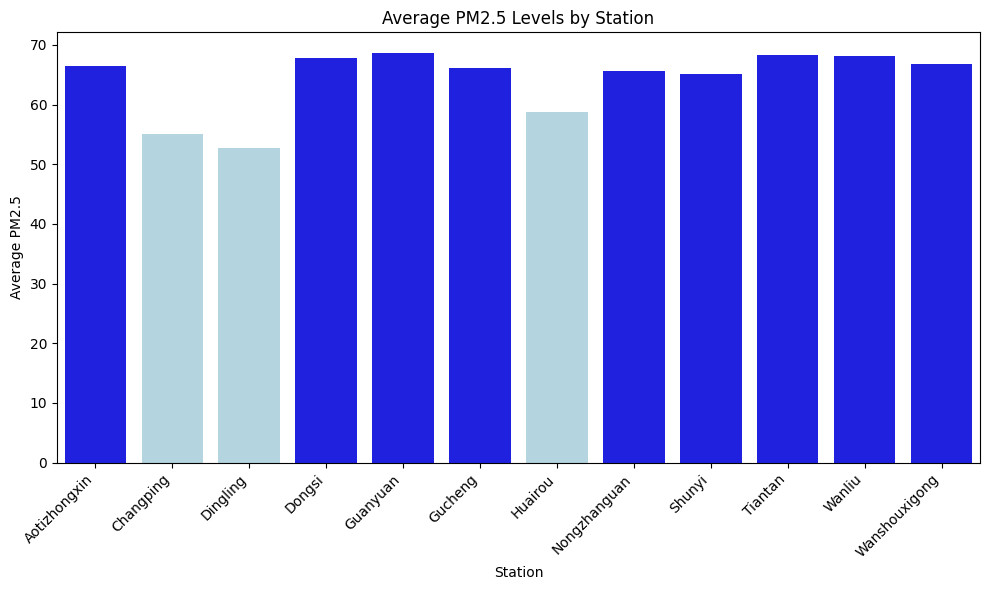

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='station',
    y='avg_PM2.5',
    hue='Kategori',
    data=grouped_summer,
    palette={'Rendah': 'lightblue', 'Sedang': 'blue', 'Tinggi': 'darkblue'}
)

plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 Levels by Station')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(False)
plt.tight_layout()

plt.show()

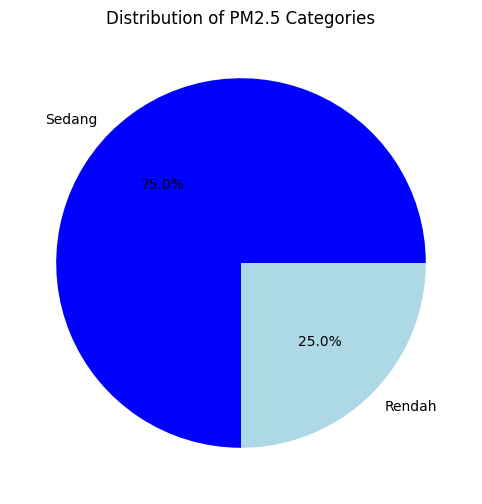

In [122]:
# Mapping warna untuk kategori
category_colors = {'Rendah': 'lightblue', 'Sedang': 'blue', 'Tinggi': 'darkblue'}

plt.figure(figsize=(10, 6))
grouped_summer['Kategori'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=[category_colors[cat] for cat in grouped_summer['Kategori'].value_counts().index]
)

plt.title('Distribution of PM2.5 Categories')
plt.ylabel('')
plt.show()


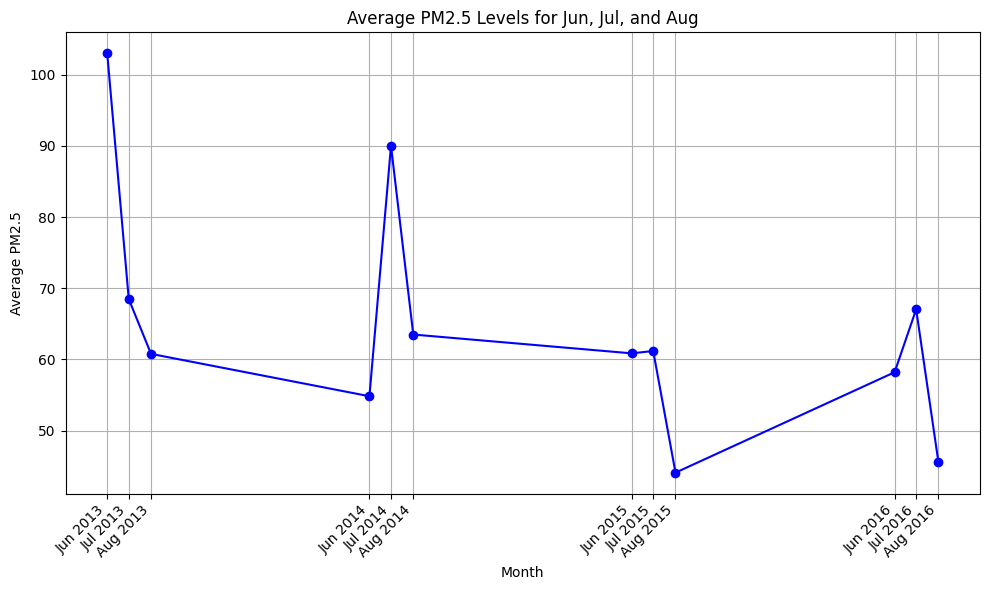

In [123]:
plt.figure(figsize=(10, 6))

plt.plot(monthly_data['year_month'], monthly_data['PM2.5'], marker='o', linestyle='-', color='b')

plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 Levels for Jun, Jul, and Aug')
plt.grid(True)

plt.xticks(monthly_data['year_month'], monthly_data['year_month'].dt.strftime('%b %Y'), rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Insight:**
- Changping, Dingling, Huairou merupakan stasiun dengan rata-rata polusi PM2.5 paling rendah selama musim panas
- Guanyuan, Tiantan, Wanliu merupakan stasiun dengan rata-rata polusi PM2.5 paling tinggi dibandingkan yang lain
- Meskipun cukup tinggi, rata-rata polusi masih tergolong sedang
- 75% stasiun tergolong dalam tingkat polusi sedang, sedangkan sisanya rendah
- Tingkat polusi tertinggi pada musim panas terjadi pada bulan juni 2013, sedangkan yang terendah terjadi pada bulan agustus 2015

### Pertanyaan 1: Bagaimana konsentrasi gas berbahaya (NO2 dan CO) di berbagai stasiun selama jam sibuk (7:00–9:00 dan 17:00–19:00) pada tahun 2016, dan bagaimana stasiun-stasiun tersebut dapat dikelompokkan berdasarkan tingkat emisi?

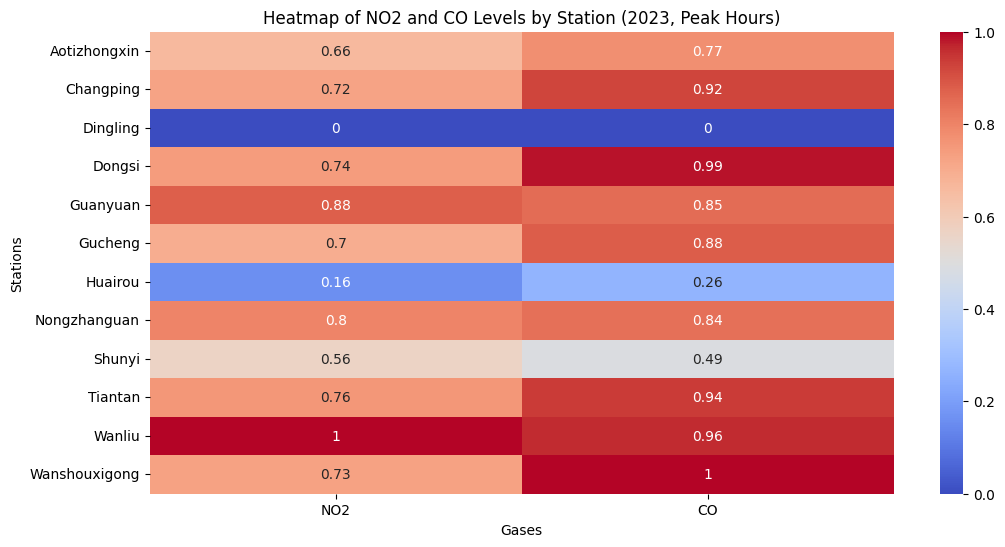

In [124]:
plt.figure(figsize=(12, 6))
sns.heatmap(scaled_emisi.set_index('station')[['NO2', 'CO']], annot=True, cmap='coolwarm')
plt.title('Heatmap of NO2 and CO Levels by Station (2023, Peak Hours)')
plt.xlabel('Gases')
plt.ylabel('Stations')

plt.show()


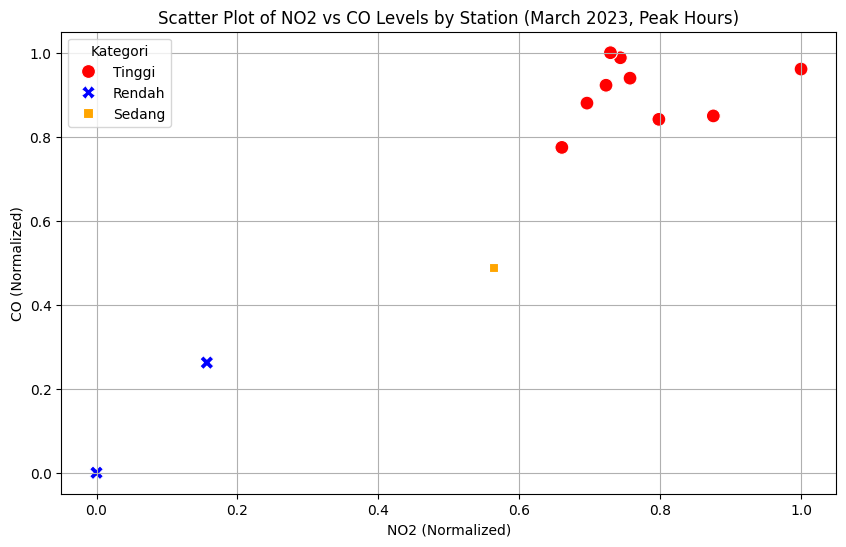

In [129]:
category_colors = {'Rendah': 'blue', 'Sedang': 'orange', 'Tinggi': 'red'}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_emisi, x='NO2', y='CO', hue='Kategori', style='Kategori', s=100, palette=category_colors)
plt.title('Scatter Plot of NO2 vs CO Levels by Station (March 2023, Peak Hours)')
plt.xlabel('NO2 (Normalized)')
plt.ylabel('CO (Normalized)')
plt.legend(title='Kategori')
plt.grid(True)
plt.show()

**Insight:**
- Berdasarkan heatmap pada saat jam sibuk, dapat dilihat bahwa dingling dan huairou merupakan stasiun dengan tingkat emisi paling rendah, shunyi merupakan stasiun dengan tingkat emisi sedang, stasiun lainnya cenderung tinggi
- NO2 dan CO berkorelasi satu sama lain, semakin tinggi NO2 maka semakin tinggi pula CO
- Di beberapa stasiun walaupun sedang jam sibuk jumlah emisinya tidak setinggi di stasiun lainnya